<a href="https://colab.research.google.com/github/Shrey327/Machine_Learning/blob/main/Reuters_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow
import tensorflow.keras as keras

In [3]:
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [4]:
len(train_data)

8982

In [5]:
len(test_data)

2246

In [6]:
train_data[2]

[1,
 53,
 12,
 284,
 15,
 14,
 272,
 26,
 53,
 959,
 32,
 818,
 15,
 14,
 272,
 26,
 39,
 684,
 70,
 11,
 14,
 12,
 3886,
 18,
 180,
 183,
 187,
 70,
 11,
 14,
 102,
 32,
 11,
 29,
 53,
 44,
 704,
 15,
 14,
 19,
 758,
 15,
 53,
 959,
 47,
 1013,
 15,
 14,
 19,
 132,
 15,
 39,
 965,
 32,
 11,
 14,
 147,
 72,
 11,
 180,
 183,
 187,
 44,
 11,
 14,
 102,
 19,
 11,
 123,
 186,
 90,
 67,
 960,
 4,
 78,
 13,
 68,
 467,
 511,
 110,
 59,
 89,
 90,
 67,
 1390,
 55,
 2678,
 92,
 617,
 80,
 1274,
 46,
 905,
 220,
 13,
 4,
 346,
 48,
 235,
 629,
 5,
 211,
 5,
 1118,
 7,
 2,
 81,
 5,
 187,
 11,
 15,
 9,
 1709,
 201,
 5,
 47,
 3615,
 18,
 478,
 4514,
 5,
 1118,
 7,
 232,
 2,
 71,
 5,
 160,
 63,
 11,
 9,
 2,
 81,
 5,
 102,
 59,
 11,
 17,
 12]

In [7]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [8]:
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [9]:
train_labels[80]

9

In [10]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
      for j in sequence:
        results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [26]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [27]:
from tensorflow.keras import models
from tensorflow.keras import layers
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

In [28]:
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

In [29]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [30]:
history = model.fit(partial_x_train,
                        partial_y_train,
                        epochs=20,
                        batch_size=512,
                        validation_data=(x_val, y_val))


Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - accuracy: 0.4152 - loss: 3.2461 - val_accuracy: 0.5870 - val_loss: 1.8882
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.6386 - loss: 1.6879 - val_accuracy: 0.6780 - val_loss: 1.4091
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.7284 - loss: 1.2456 - val_accuracy: 0.7160 - val_loss: 1.2311
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.7863 - loss: 0.9884 - val_accuracy: 0.7600 - val_loss: 1.1041
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.8179 - loss: 0.8325 - val_accuracy: 0.7650 - val_loss: 1.0355
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.8524 - loss: 0.7014 - val_accuracy: 0.7770 - val_loss: 0.9753
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.8834 - loss: 0.5766 - val_accuracy: 0.7870 - val_loss: 0.9426
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - accuracy: 0.9068 - loss: 0.4742 - val_accuracy: 0.8060 - v

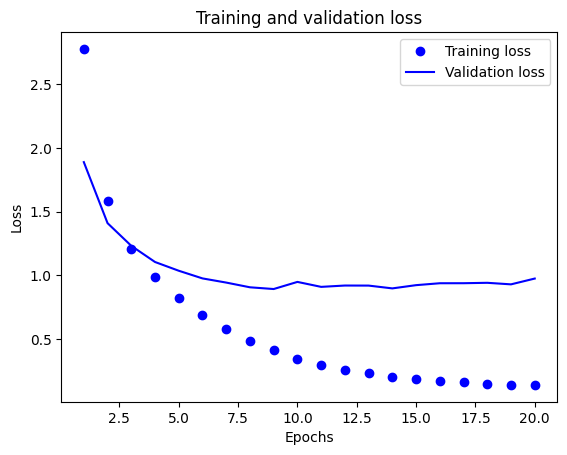

In [31]:
import matplotlib.pyplot as plt
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

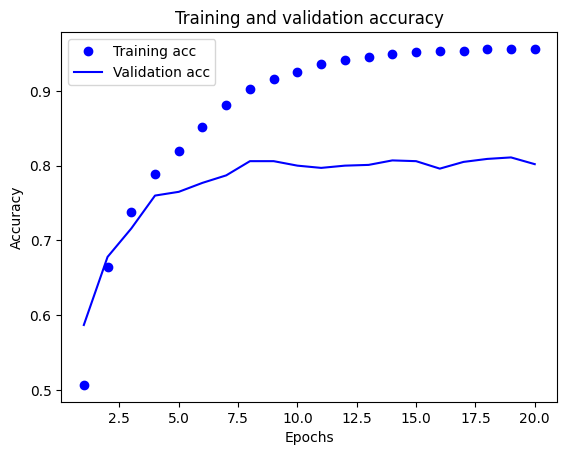

In [32]:
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [37]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(partial_x_train,
          partial_y_train,
          epochs=9,
          batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.4087 - loss: 3.1563
Epoch 2/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.6605 - loss: 1.5981
Epoch 3/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - accuracy: 0.7440 - loss: 1.1978
Epoch 4/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - accuracy: 0.7974 - loss: 0.9754
Epoch 5/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.8271 - loss: 0.8324
Epoch 6/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.8609 - loss: 0.6793
Epoch 7/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.8806 - loss: 0.5891
Epoch 8/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.8922 - loss: 0.4838
Epoch 9/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.9130 - loss: 0.4009
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7892 - loss: 0.9501


In [38]:
results

[0.9733644127845764, 0.7756010890007019]

In [39]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
hits_array.mean()

0.19768477292965272

In [40]:
predictions = model.predict(x_test)

71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


In [41]:
predictions[0].shape

(46,)

In [42]:
np.sum(predictions[0])

1.0000002

In [43]:
np.argmax(predictions[0])

3